Tugas ini berupa mini project yang diselesaikan diakhir pertemuan bulan pertama. Tugas disusun sesuai dengan materi yang diberikan tiap harinya di pekan 4. 

# Dataset

silahkan unduh dataset berikut untuk mengerjakan tugas pekan 4:

[pelanggan_supermarket.csv](https://drive.google.com/uc?export=download&id=1jaxCbZ4fcCneeVCEN-yuxWE0RyX25tbQ)



---



---



---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1jaxCbZ4fcCneeVCEN-yuxWE0RyX25tbQ')
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0




---



---



---



# Soal 1. Statistika Deskriptif

lakukan eksplorasi data dengan menggunakan statistika deskriptif. Gunakan pandas untuk mendapatkan summary statistics, dan analisa hasil yang ditampilkan.

In [ ]:
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                250 non-null    int64  
 1   Jenis Kelamin               250 non-null    object 
 2   Umur                        245 non-null    float64
 3   Pendapatan pertahun (juta)  250 non-null    int64  
 4   Skor Belanja (1-100)        246 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.9+ KB


Dari data diatas diperoleh informasi sebagai berikut:
- Terdapat 250 data yang meliputi informasi ID_pelanggan (int), Jenis Kelamin (string), Umur (float), Pendapatan pertahun (juta) (int), dan Skor Belanja (float).
- Dari data diatas terdapat data yang hilang pada kolom Umur dan skor belanja. Data kosong ini perlu ditindaklanjuti sebelum melakukan pengolahan data.
- Jika dibagi berdasarkan tipe data, data kategori meliputi : Id_pelanggan dan jenis kelamin, sedangkan data numerik meliputi : Umur, pendapatan dan skor belanja. 
- Karena ID_pelanggan merupakan identifier, jadi sebenarnya tidak terlalu menarik untuk mengolah atau memnganalisis deskripsi statistik dari nilai tersebut. 

**1.1 Jenis Kelamin**

Karena jenis kelamin merupakan tipe data kategori, maka yang mungkin kita ambil dari data ini adalah nilai modusnya. Dan dapat diperoleh pada perhitungan berikut bahwa pelanggan didominasi oleh pelanggan berjenis kelamin perempuan.

In [ ]:
mode = stats.mode(df["Jenis Kelamin"])
print(f"Modus : {mode[0][0]}")

Modus : Perempuan


**1.2 ID_pelanggan, Umur, Pendapatan Pertahun, dan Skor Belanja**

In [ ]:
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


**- ID Pelanggan**
- Meski tidak ada hal yang menarik pada data ini sebagaimana disampaiakan pada poin sebelumnya, tapi bisa kita gunakan ID pelanggan utuk memeriksa apakah ada dulpikasi data. Duplikasi data bisa diketahui dengan memeriksa banyaknya Id yang unik kemudian membandingkan dengan jumlah data. Jika terdapat data yang duplikasi, mungkin akan dipertimbahkan untuk menghapus salah satu data jika ada aturan pelanggan hanya boleh melakukan review sebanyak satu kali


In [ ]:
uniqueId = len(df["ID_pelanggan"].unique())
rows, cols = df.shape
print(f"Jumlah ID yang unik ada {uniqueId} dan jumlah data {rows}")
print("Tidak ada ID yang duplikat" if (uniqueId==rows) else "terdapat duplikasi ID pelanggan") 

Jumlah ID yang unik ada 250 dan jumlah data 250
Tidak ada ID yang duplikat


- Namun jika ID pelanggan dianggap sebuah nilai yang perlu dihitung nilai statistik pada kasus ini, maka bisa kita lihat bahwa rataan id pelanggan adalah 125.5 dengan standar deviasi 72. Sehingga bisa kita lihat bahwa data menyimpang cukup jauh dari rata-rata. Bisa kita lihat juga nilai 25% , 50%, dan 75% data pertama memiliki selisih yang seragam. Dengan kata lain, memiliki distribusi yang simetrik. 


**Umur**
- Dari 245 data diperoleh rata-rata umur pelanggan supermarket adalah 38.73 tahun dengan pelanggan termuda 18 tahun dan tertua 120 tahun. Ada dugaan pelanggan dengan usia 120 tahun merupakan umur yang tidak valid, karena harapan hidup manusia di bawah 100 tahun. Datum seperti ini mungkin akan diganti dengan nilai tertentu atau bahkan dihapus. Untuk memastikan datum ini merupakan pencilan, perlu dihitung nilai IQR, kemudian dibandingkan dengan nilai ini.
- Dengan nilai simpangan baku 14.32, jarak antara usia pelanggan dengan rata-rata tidak terlalu besar. 
- Terdapat 5 data yang tidak diketahui umur pelanggan. Data hilang mungkin akan diganti dengan nilai tertentu, misalkan median. Karena simpangan terlalu besar, baiknya nilai tersebut tidak diganti dengan nilai mean karena mean, sangat terpengaruh dengan nilai standar deviasi.

**Pendapatan pertahun (juta)**
- Rata-rata pendapatan 250 pengunjung supermarket ini adalah 64.74 juta/tahun. Nilai terendah dan tertinggi berturut-turut 15 juta dan 137 juta. Data tersebar cukup jauh dengan range 122juta dan simpangan baku 25 juta. 
- Pendapatan maksimum ini sedikit mencurigakan, karena selisihnya terlampau jauh dari nilai rata-ratanya. Untuk memastikan data ini merupakan pencilan atau tidak bisa kita periksa baik dengan visualisasi boxplot, metode IQR atau dengan z-index.

**Skor Belanja (1-100)**
- Pada skala 1-100, penilaian pelanggan terhadap supermarket tidak bisa dikatakan baik, karena rata-rata penilaian di angka 50.32. Dari tabel resume statistik di atas, diperoleh nilai minimum dan nilai maksimum berturut-turut 3 dan 150. 
- Nilai maksimum jelas merupakan data yang tidak valid karena skor belanja dibatasi pada nilai 1-100. Data ini jelas akan dihapus/diganti dengan nilai lain.
- Simpangan nilai minimum skor belanja dengan rata-rata terlampau besar, dengan kata lain merupakan anomali. Mungkin ada kekeliruan pengisian sehingga data ini perlu ditindaklanjuti.  
- Karena pada skor belanja terdapat nilai yang tidak diketahui, maka perlu penanganan.

**Expected output**

![](https://drive.google.com/uc?id=1-5_d0Ey1lWMXj0d8ABimuPqqTz-h-8mx)



---



---



---



# Soal 2. Handling missing value

Jika dilihat dari summary statistik terlihat dataset memiliki nilai missing. Hitunglah jumlah missing value menggunakan methode .isnull(). 

Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [ ]:
print("Banyaknya nilai kosong pada data sebelum menerapkan ffill method")
display(df.isnull().sum())

# handle mising value with ffill method
df.fillna(method="ffill", inplace=True)

print("\nBanyaknya nilai kosong pada data setelah menerapkan ffill method")
display(df.isnull().sum())

Banyaknya nilai kosong pada data sebelum menerapkan ffill method


ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64


Banyaknya nilai kosong pada data setelah menerapkan ffill method


ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

In [ ]:
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0




---



---



---



# Soal 3. Handling outlier

1. Apakah data set memiliki nilai pencilan untuk setiap kolom? periksalah dengan melakukan visualisasi menggunakan boxplot.
2. Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)
3. simpan data hasil handling outlier ke dalam variabel df2
4. Teknik ini akan menghasilkan nilai missing pada nilai outlier yang telah dihapus, maka hapuslah data missing tersebut dengan menggunakan method .dropna()

In [ ]:
import math
class MultiplePlot:
  def __init__(self, df,columns, ncols=None, figsize=(16,4)):
    self.df = df
    self.ncols = ncols if ncols!=None else 1
    self.nrows = math.ceil(len(columns)/self.ncols)
    self.figsize = figsize
    self.columns = columns
    self.__createFrame()
  
  def __createFrame(self):
    self.fig, self.ax = plt.subplots(
      ncols=self.ncols, 
      nrows=self.nrows, 
      figsize=self.figsize
    )
  
  def getPlotFunction(self, type) :
    plotFunc = sns.lineplot
    if (type=="boxplot"):
      plotFunc = sns.boxplot 
    elif (type=="distplot"):
      plotFunc = sns.distplot
    return plotFunc

  def plot(self, type):
    plotFunc = self.getPlotFunction(type)
    idCol=0
    for (idx, row) in enumerate(self.ax):
      for (idy, el) in enumerate(row):
        if (idCol<len(self.columns)):
          plotFunc(ax=self.ax[idx][idy], x=self.df[self.columns[idCol]])
          self.ax[idx][idy].set_xlabel(self.columns[idCol])
        else:
          self.fig.delaxes(self.ax[idx][idy])
        idCol+=1
  
  def show(self):
    self.fig.tight_layout(pad=1.5)
    self.fig.show()

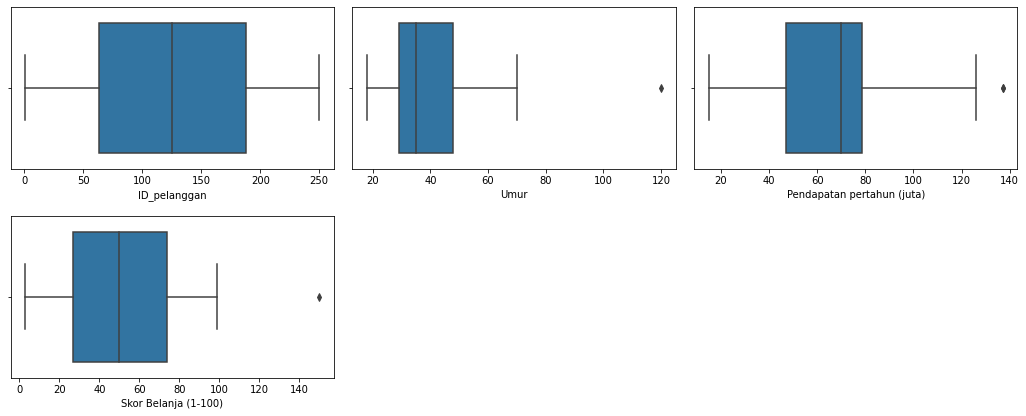

In [ ]:
columns = [ 
           "ID_pelanggan", 
           "Umur", 
           "Pendapatan pertahun (juta)", 
           "Skor Belanja (1-100)"
          ]

boxplot = MultiplePlot(
    df=df, 
    columns=columns, 
    ncols=3, 
    figsize=(14.5,6)
)

boxplot.plot("boxplot")
boxplot.show()

Pada grafik diatas nampak bahwa terdapat data pencilan pada kolom "Umur", "Pendapatan" dan "skor belanja".

**Expected output**

Melihat adanya pencilan menggunakan Boxplot

![](https://drive.google.com/uc?id=1ettD4G8xBMCYcMUVt88kn5k_yCufgdyf)

In [ ]:
def getBoundary(df, isDisplay=False):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 -q1

  LIMIT = 1.5 * iqr
  lowerBound = q1 - LIMIT
  upperBound = q3 + LIMIT
  
  if (isDisplay):
    print("\n===== IQR =====")  
    display(iqr)
    print("\n===== Batas Bawah =====")
    print(lowerBound)
    print("\n===== Batas Atas =====")
    print(upperBound)

  return [lowerBound, upperBound]

def removeOutlierWithIqr(df, isDisplay=False):
  [lowerBound, upperBound] = getBoundary(df, isDisplay)
  isOutlier = ((df < lowerBound) | (df > upperBound)).any(axis=1)
  print("\n===== The Outliers =====")
  display(df[isOutlier])
  cleanedDf = df[~isOutlier]
  if (isDisplay):
    print("\ndata before removing outliers:", df.shape[0])
    print("data after removing outliers:", cleanedDf.shape[0])
  return cleanedDf


In [ ]:
df2 = removeOutlierWithIqr(df, True)
print("\n===== Cleaned Data =====")
df2


===== IQR =====


ID_pelanggan                  124.50
Umur                           19.00
Pendapatan pertahun (juta)     31.75
Skor Belanja (1-100)           47.00
dtype: float64


===== Batas Bawah =====
ID_pelanggan                 -123.500
Umur                            0.500
Pendapatan pertahun (juta)     -0.625
Skor Belanja (1-100)          -43.500
dtype: float64

===== Batas Atas =====
ID_pelanggan                  374.500
Umur                           76.500
Pendapatan pertahun (juta)    126.375
Skor Belanja (1-100)          144.500
dtype: float64

===== The Outliers =====


,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
16,17,Perempuan,35.0,21,150.0
198,199,Laki-laki,32.0,137,18.0
199,200,Laki-laki,30.0,137,83.0
249,250,Laki-laki,120.0,98,15.0



data before removing outliers: 250
data after removing outliers: 246

===== Cleaned Data =====


,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
244,245,Laki-laki,27.0,88,69.0
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0


Seteleh menghapus outlier dari data dengan menggunakan metode IQR, diperoleh 246 data. Namun jika diplot kembali dengan menggunakan boxplot sebagaimana gambar di bawah, terdapat outlier yang baru. Ini terjadi karena terdapat perhitungan ulang nilai IQR dengan data baru.

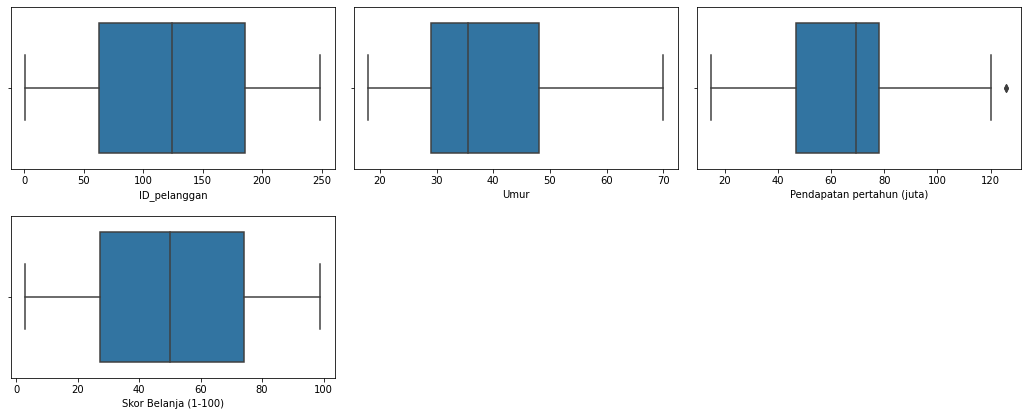

In [ ]:
boxplot = MultiplePlot(
    df=df2, 
    columns=columns, 
    ncols=3, 
    figsize=(14.5,6)
)

boxplot.plot("boxplot")
boxplot.show()



---



---



---



# Soal 4. statistika Inferential



*   Kita akan melakukan hipotesis terhadap 100 sample pengunjung Supermarket. Hipotesis awal adalah rata2 usia pengunjung supermarket di atas 35 tahun. Ujilah hipotesis tersebut dengan menggunakan teknik klasik (z-testing) dan probabilitas p-value)!
*   Gunakan variabel dataframe hasil handling missing value dan outlier di no soal sebelumnya
*   Untuk mempermudah perhitungan, ubahlah tipe data kolom Umur menjadi int dengan menggunakan methode .astype() baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html





In [ ]:
df_100 = df2.sample(100,  random_state=1)
display(df_100)


,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
68,69,Laki-laki,19.0,48,59.0
248,249,Perempuan,32.0,97,86.0
211,212,Laki-laki,25.0,77,12.0
225,226,Laki-laki,30.0,78,4.0
91,92,Laki-laki,18.0,59,41.0
...,...,...,...,...,...
5,6,Perempuan,22.0,17,76.0
184,185,Perempuan,41.0,99,39.0
186,187,Perempuan,54.0,101,24.0
49,50,Perempuan,31.0,40,42.0


In [ ]:
df_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 68 to 201
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                100 non-null    int64  
 1   Jenis Kelamin               100 non-null    object 
 2   Umur                        100 non-null    float64
 3   Pendapatan pertahun (juta)  100 non-null    int64  
 4   Skor Belanja (1-100)        100 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.7+ KB


In [ ]:
# Karena Umur terdeteksi sebagai float64, maka nampaknya tidak perlu konversi kolom umur dengan astype(int)

In [ ]:
# xbar pop
# mu => hyp
# n = sample

def getZVal(xbar, mu, sigma, n, isDisplay=False):
  zVal = (xbar-mu)/(sigma/n**0.5)
  if isDisplay: print(f"nilai z hitung : {zVal}")
  return zVal

def separation(text):
  print(f"\n============= {text} =============")


In [ ]:
#code here for z-test
#menggunakan perhitungan manual 
h = [
     "rata-rata usia = 35 tahun", 
     "rata-rata usia > 35 tahun"
    ]
alpha = 0.05
zTab = 1.64

separation("Hipotesis")
for idx, el in enumerate (h): print(f"- H{idx} : {el}")

separation("Nilai Alpha")
print(f"alpha : {alpha}")

zVal = getZVal(
    xbar=df_100["Umur"].mean(), 
    mu=35, 
    sigma = df_100["Umur"].std(), 
    n = 100, 
)
separation("Z Hitung v Z Tabel")
print(f"z-hitung : {zVal}\nz-tabel  : {zTab}")

separation("Kesimpulan")
if (zVal <= zTab):
  print("- karena z-hitung <= z-tabel, maka H0 diterima")
  print(f"- {h[0]}")
else :
  print("- karena z-hitung > z-tabel, maka H0 ditolak")
  print(f"- {h[1]}")


============= Hipotesis =============
- H0 : rata-rata usia = 35 tahun
- H1 : rata-rata usia > 35 tahun

============= Nilai Alpha =============
alpha : 0.05

============= Z Hitung v Z Tabel =============
z-hitung : 2.4874107887154624
z-tabel  : 1.64

============= Kesimpulan =============
- karena z-hitung > z-tabel, maka H0 ditolak
- rata-rata usia > 35 tahun


In [ ]:
#code here for p-value

tabVal = 0.9936
pValTable = 1- tabVal

separation("Mencari P-Value")
print(f"Data Dari Tabel untuk z({zVal})   : {tabVal}")
print(f"Nilai P-Value : {pValTable}")

separation("P-Value dan Alpha")
print(f"P-Value   : {pValTable}")
print(f"Alpha     : {alpha}")

separation("Kesimpulan")
if (pValTable < alpha):
  print(f"uji statistik pada daerah penolakan, maka '{h[1]}' diterima")
else: 
  print(f"uji statistik di luar daerah penolakan, maka {h[0]} diterima)")


============= Mencari P-Value =============
Data Dari Tabel untuk z(2.4874107887154624)   : 0.9936
Nilai P-Value : 0.006399999999999961

============= P-Value dan Alpha =============
P-Value   : 0.006399999999999961
Alpha     : 0.05

============= Kesimpulan =============
uji statistik pada daerah penolakan, maka 'rata-rata usia > 35 tahun' diterima


In [ ]:
#code here for z-test
# Menggunakan librari statsmodels

from scipy import stats
from statsmodels.stats import weightstats as stests

ztest, pval = stests.ztest(df_100.Umur, value=35, alternative="larger")
print(ztest, pval)

2.4874107887154624 0.006433836091848494


Give your analysis:

- Pada pernyataan di soal, ditentukan hipotesis sebagai berikut.
  - H0 : rata-rata usia = 35 tahun
  - H1 : rata-rata usia > 35 tahun
- Dari hipotesis di atas, ditentukan metode uji yang digunakan adalah uji satu arah.
- Telah ditentukan pula nilai alpha = 0.05
- Telah dilakukan perhitungan baik menggunakan perhitungan manual atau librari statsmodels. Keduanya menghasilkan hasil yang serupa yakni nilai z = 2.49 dan p = 0.064.
Karena nilai zhitung (2.49) > ztabel (1.64), maka hipotesis null ditolak. Hal ini diperkuat dengan perbandingan nilai pValue (0.064) yang lebih kecil dari nilai alpha yang telah ditentukan (0.05). Dengan demkian ada bukti yang kuat bahwa usia rata-rata pelanggan di atas 35 tahun.
 



---



---



---



## Soal 5. EDA

Lakukan eksplorasi data analisis. Gunakan visualisasi distplot untuk melihat sebaran data dan histogram pada setiap kolom dataset awal sebelum dilakukan handling missing value maupun outlier

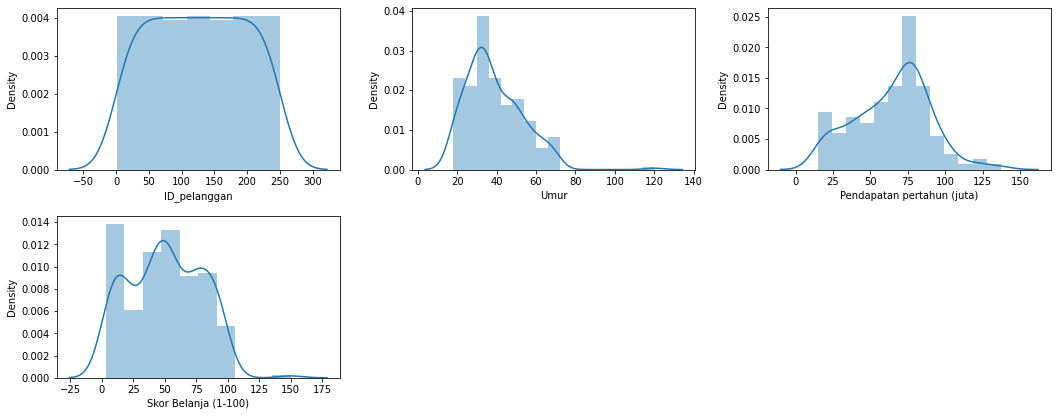

In [ ]:
#code here for univariate 
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1jaxCbZ4fcCneeVCEN-yuxWE0RyX25tbQ")
boxplot = MultiplePlot(
    df=df, 
    columns=columns, 
    ncols=3, 
    figsize=(15,6)
)

boxplot.plot("distplot")
boxplot.show()


Give your analysis:

**Pendahuluan**
- Telah disajikan data dalam bentuk plot histogram dan kurva distribusinya. 
- Dari sini bisa kita lihat bagaimana data itu terdistribusi, condong ke arah mana, dsb. 

**ID_pelanggan**
- Pada grafik di atas, distribusi data simetris dengan memiliki banyak puncak.
- Data ID pelanggan memiliki sifat keruncingan yang datar.
- Nampak bahwa simpangan data terhadap rata-rata (simpangan baku) bernilai besar.

**Umur**
- Data terdistribusi dengan condong ke arah kiri, dengan kata lain, lebih banyak pelanggan dengan usia muda.
- Secara umum simpangan data tidak besar, sehingga data cenderung berkumpul di sekitar mean , hal ini memberikan pengaruh terhadap keruncingan bentuk histogram menjadi lebih runcing.


**Pendapatan Tahunan**
- Data lebih condong ke arah kanan, dengan kata lain pelanggan lebih banyak pada kategori dengan pendapatan tahunan yang tinggi
- Dibandingkan umur, nampaknya nilai simpangan baku nya lebih besar, hal ini dilihat dari grafik histogram bahwa grafik cenderung melebar. 

**Skor Belanja**
- Pada grafik di atas, distribusi data (hampir) simetris dengan memiliki banyak puncak.
- Data tersebar pada hampir secara merata pada rentang 0-100.

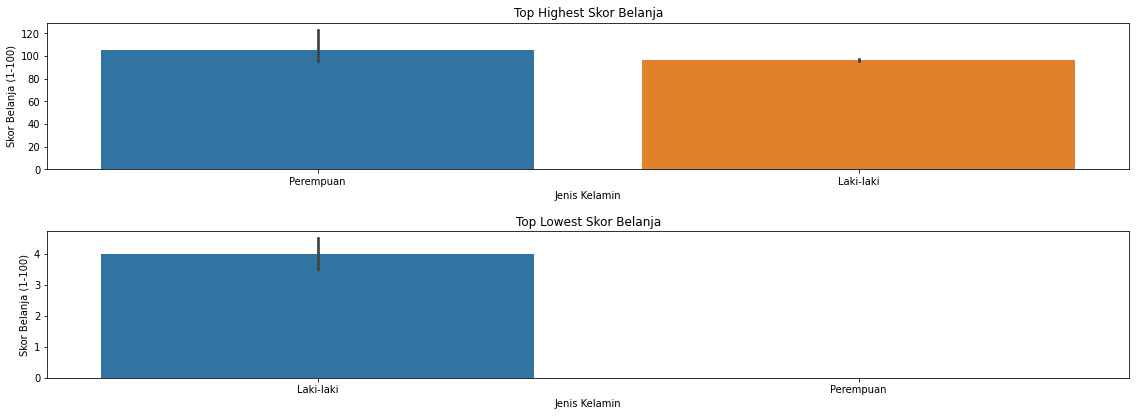

In [ ]:
sortedDf = df.sort_values("Skor Belanja (1-100)", ascending=False)

plt.figure(figsize=(16,6))
plt.subplot(211)
plt.title("Top Highest Skor Belanja")
sns.barplot(sortedDf["Jenis Kelamin"].head(10), sortedDf["Skor Belanja (1-100)"].head(10))
plt.subplot(212)
plt.title("Top Lowest Skor Belanja")
sns.barplot(sortedDf["Jenis Kelamin"].tail(10), sortedDf["Skor Belanja (1-100)"].tail(10))
plt.tight_layout(pad=1.5)
plt.show()


Give your analysis:

- grafik di atas merupakan nilai rata2 pada 10 skor terbaik / terburuk yang dikelompokan berdasarkan kategori.
- grafik diperoleh dari : 
  - pengurutan data berdasarkan skor belanja, 
  - ambil 10 data  terbaik / terburuk
  - plot rata-rata dan standar deviasinya yang telah dikelompokkan berdasarkan jenis kelamin.

**Top Highest Skor Belanja**
- Pada 10 skor terbaik, rataan skor belanja perempuan lebih baik dibandingkan dengan laki-laki. 
- sebaran skor belanja perempuan lebih tinggi dibandingkan dengan laki-laki. Dengan kata lain, pada kelompok laki-laki nilainya tidak terlalu jauh berbeda dengan rata-ratanya. 

**Top Lowest Skor Belanja**
- Hanya terdapat pelanggan dengan jenis kelamin laki-laki pada 10 skor terburuk. Rata-rata skornya kisaran 4, dengan simpangan baku yang tidak terlalu besar. 

**Umum**
- Dapat dilihat pada grafik bahwa respons pada pelanggan wanita memiliki kecenderungan untuk memberikan penilaian yang lebih baik dibandingkan dengan pelanggan laki-laki. 
- Hal itu dapat dilihat dengan tingginya penilaian terbaik dan tidak adanya penilaian buruk (pada 10 skor terbaik dan terburuk) pada pelanggan jenis kelamin wanita.


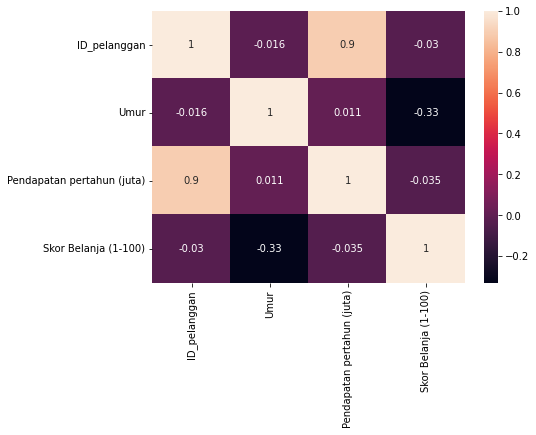

In [ ]:
#code here for multivariate
fig, ax = plt.subplots(figsize=(7,5))

sns.heatmap(df.corr(), annot=True)
plt.show()

Give your analysis:

**Pendahuluan**
- Heatmap di atas merupakan visualisasi hubungan / korelasi antara dua variabel. 

- Rentang nilai korelasi bereada pada -1 <= x <= 1. Jika |x| mendekati nilai 1 berarti ada hubungan kuat antara dua variabel tersebut, tapi jika mendekati nilai 0, maka tidak ada hubungan sama sekali. Sedangkan nilai positif atau negatif menunjukan arah korelasinya. 

- Pada pembahasan ini akan dibahas korelasi antara dua variabel yang berbeda (ID Pelanggan, Umur, pendapatan pertahun dan skor belanja).

**ID Pelanggan vs Skor Belanja**
- Mulai dari hubungan ID Pelanggan dan skor belanja. Kita bisa lihat korelasi kedua variabel ini sangat kecil (-0.03). Sehingga nyaris tidak ada pengaruh antara ID Pelanggan dan skor belanja. 

**ID Pelanggan vs Pendapatan Pertahun**
- Dari heatmeap di atas bisa kita lihat bahwa ada hubungan yang sangat tinggi antara ID pelanggan dan Pendapatan pertahun (nilai korelasi 0.9). Semakin besar ID Pelanggan, Pendapatan tahunan semakin besar pula.

**ID Pelanggan vs Pendapatan Pertahun**
- Nilai korelasi antara dua variabel ini adalah -0.016, dengan demikian nyaris tidak ada hubungan antara keduanya.

**Umur vs Skor Belanja**
- Meski rendah, ada hubungan antara umur pelanggan dengan skor belanja. Hal ini ditunjukan dengan nilai korelasi -0.33. Karena korelasi bernilai negatif, bisa ditafsirkan bahwa semakin tua usia pelanggan, maka semakin rendah penilainnya.

**Umur vs Pendapatan Pertahun**
- Hubungan antara kedua variabel ini sangat rendah, nilai korelasinya hanya 0.011. 

**Pendapatan Pertahun vs skor belanja**
- Hubungan antara kedua variabel ini sangat rendah, nilai korelasinya hanya -0.035. 


**Expected output**

Univariate plot

![](https://drive.google.com/uc?id=12BSOah7WFzuOEJsKfsaNDw799zzqbDIs)

Bivariate plot

![](https://drive.google.com/uc?id=1JI_NM4Nr-ZN1aszv0m-iL46Qm0xNLFw3)

Multivariate plot

![](https://drive.google.com/uc?id=1TTXm3BjoqqwSGMGE1en9ZIJT53Wm5SFf)



---

---



---





# Soal 6. Data scaling
lakukan scaling data dengan menggunakan standarisasi untuk kolom Umur dan skor belanja saja tetapi menggunakan variabel dataframe setelah handling missing value dan outlier

In [ ]:
#code here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_columns = ["Umur", "Skor Belanja (1-100)"]

df2_scaled = df2.copy() 
for col in scaled_columns:
  scaler.fit(df2_scaled[[col]])
  df2_scaled[col] = scaler.transform(df2[[col]])

df2_scaled.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,-1.455408,15,-0.396862
1,2,Laki-laki,-1.305038,15,1.121236
2,3,Perempuan,-1.380223,16,-1.589654
3,4,Perempuan,-1.154669,16,0.976655
4,5,Perempuan,-0.553190,17,-0.360717




---



---



---



# Soal 7. Clustering menggunakan k-menas

*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

In [ ]:
#code here 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

class KMeansCluster:
  def __init__(self, df, columns, n_clusters):
    self.df = df.copy()
    self.columns = columns
    self.n_clusters = n_clusters
    self.__generateCluster()

  def separation(self, text):
    print(f"\n======== {text} ========")
  
  @staticmethod
  def elbowPlot(df, columns, clusterRange):
    sse = []
    for k in clusterRange:
        km = KMeans(n_clusters=k)
        km.fit(df[columns])
        sse.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(10,6))        
    ax.set_xlabel('n_cluster')
    ax.set_ylabel('wcss')
    ax.plot(clusterRange,sse)
    plt.title("Elbow Method")
    plt.show()

  def __generateCluster(self):
    print(f"generate {self.n_clusters} clusters ..." )
    self.km = KMeans(n_clusters=self.n_clusters)
    self.df["cluster"] = self.km.fit_predict(self.df[self.columns])
    separation("5 Data Hasil Klastering")
    display(self.df.head())
  
  def showSilhouetteScore(self):
    print(f"Silhouette Score(n={self.n_clusters}): {silhouette_score(self.df[self.columns], self.df.cluster)}")

  def plot(self, colors):
    separation("Scatter Plot")
    self.fig, self.ax = plt.subplots(figsize=(11,7))
    for i in range(self.n_clusters):
      temp = self.df[self.df.cluster==i]
      plt.ylabel("Skor Belanja (1-100)")
      plt.xlabel("Umur")
      plt.scatter(temp[self.columns[0]], temp[self.columns[1]], color=colors[i], edgecolors="green", s=100)
      plt.scatter(self.km.cluster_centers_[:,0],self.km.cluster_centers_[:,1],color='k',s=300)

    plt.show()


generate 2 clusters ...

============= 5 Data Hasil Klastering =============


,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100),cluster
0,1,Laki-laki,-1.455408,15,-0.396862,1
1,2,Laki-laki,-1.305038,15,1.121236,1
2,3,Perempuan,-1.380223,16,-1.589654,0
3,4,Perempuan,-1.154669,16,0.976655,1
4,5,Perempuan,-0.553190,17,-0.360717,1



============= Scatter Plot =============


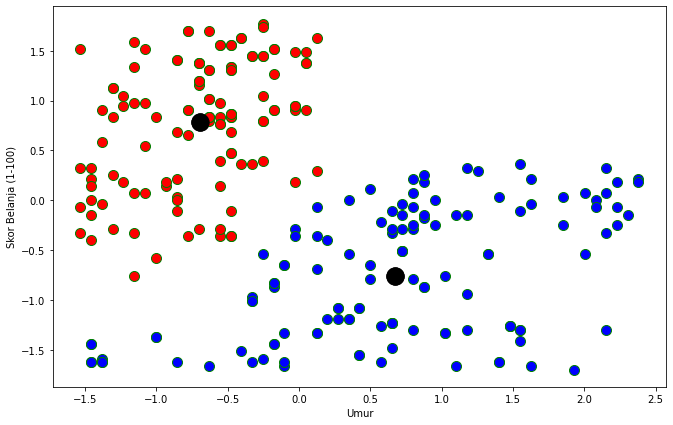

In [ ]:
df2Cluster = KMeansCluster(
    df=df2_scaled, 
    columns=scaled_columns, 
    n_clusters=2
)
df2Cluster.plot(["blue", "red"])

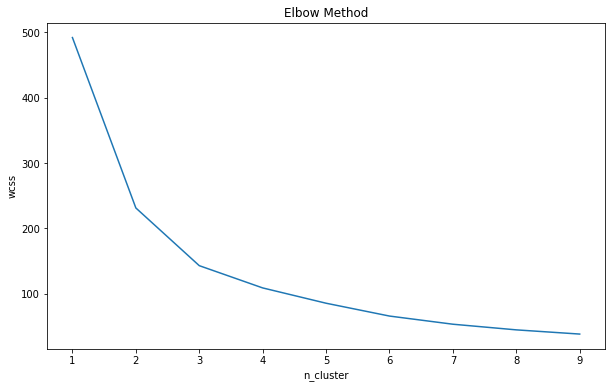

In [ ]:
KMeansCluster.elbowPlot(df2_scaled, scaled_columns, range(1,10))

generate 3 clusters ...

============= 5 Data Hasil Klastering =============


,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100),cluster
0,1,Laki-laki,-1.455408,15,-0.396862,2
1,2,Laki-laki,-1.305038,15,1.121236,0
2,3,Perempuan,-1.380223,16,-1.589654,2
3,4,Perempuan,-1.154669,16,0.976655,0
4,5,Perempuan,-0.553190,17,-0.360717,2



============= Scatter Plot =============


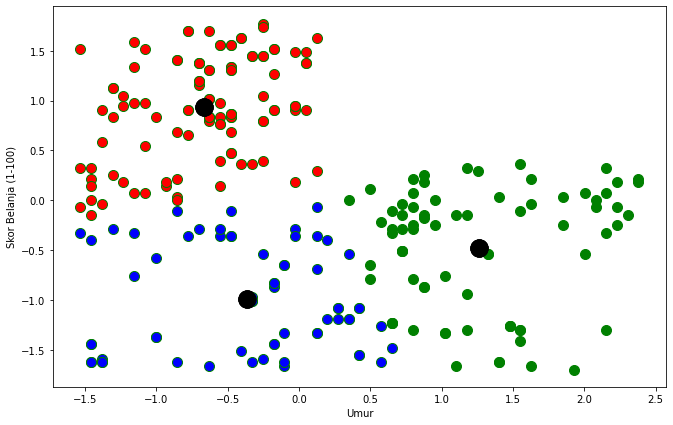

In [ ]:
df3Cluster = KMeansCluster(
    df=df2_scaled, 
    columns=scaled_columns, 
    n_clusters=3
)
df3Cluster.plot(["red", "green", "blue"])

**Expected output**

cluster 2

![](https://drive.google.com/uc?id=1L7nIskGXbeXGhKOzhMWCykJ4jY5538mn)

elbow method

![](https://drive.google.com/uc?id=1a3OL9FhiQ2-DyJQ8sg8PNzfS9QsszyvU)

cluster 3

![](https://drive.google.com/uc?id=1UR6vK36oLJinLPtechjJJBtxifmdFOSn)


In [ ]:
#silhoutte score
df2Cluster.showSilhouetteScore()
df3Cluster.showSilhouetteScore()

Silhouette Score(n=2): 0.4854766884293722
Silhouette Score(n=3): 0.46475332972661465




---



---



---



# Soal 8. Analyze clustering result

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk targetted market supermarket

- Telah dilakukan pengujian klastering dengan dua metode, pertama dengan metode elbow, kemudian dengan menghitung skor silhouette.
- Dengan menggunakan metode elbow bisa membantu kita untuk menentukan jumlah klaster yang paling optimum dengan mencari titik yang membentuk "siku" pada "lengan" grafik. Pada grafik di atas, dapat dilihat bahwa jumlah klaster yang optimum (bisa mengklasifikasikan dengan baik) adalah dua atau tiga klaster. Hal ini karena posisi elbow secara kasat mata hampir sama. 
- Dengan menggunkanan nilai skor silhoutte, klaster 2 lebih baik daripada skor silhouette untuk klaster 3.  
- Selain itu, bisa dilihat pada scatter plot bahwa pada klasterisasi dengan jumlah 2 klaster, kita bisa membedakan dengan jelas. Sedangkan dengan banyak 3 klaster, ada beberapa titik yang nampaknya cukup berdekatan. 

**Analisa Dengan 2 Klaster**
- Pada klaster ini terbagi atas 2 kelompok yakni
  - Semua usia dengan skor rendah - sedang (A)
  - Usia muda dengan skor sedang - tinggi (B)
- Rekomendasi pada pengklasteran ini, pemilik toko mungkin bisa fokus menggarap konsumen dengan usia muda, karena dari mereka toko mendapatkan skor belanja yang sangat baik. 


**Analisa Dengan 3 Klaster**
- Pada klaster ini terbagi atas 3 kelompok yakni
  - Usia sedang-tua dengan skor rendah - sedang (A)
  - Usia muda-sedang dengan skor rendah - sedang (B)
  - Usia muda-sedang dengan skor sedang - tinggi (C)
- Meski secara metode siluet menyarankan membagi 2 klaster (disamping lebih bisa mengklasifikasikan sebuah objek), namun untuk kasus ini sepertinya lebih baik membagi menjadi 3 kelompok. sehingga kita bisa memberikan perlakuan yang berbeda kepada ketiga kelompok tersebut. 
- Kelompok (C) merupakan aset yang berharga bagi toko, sehingga toko perlu memberikan semacam reward sehingga mereka bisa menjadi pelanggan tetap.   
- Karena tidak ditemukan penilaian dengan skor tinggi pada kelompol usia tua (A), pemilik toko perlu mengevaluasi pelayanan kepada kelompok ini.  
- Pelayanan Kelompok (B) perlu dievaluasi kembali selayaknya kelompok A. Namun perlakuan antara kelompok (A) dan (B) mungkin bisa berbeda, mengingat mereka berasal dari kelompok usia yang berbeda. 

